In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('benroshan/factors-affecting-campus-placement', unzip=True)

In [3]:
import pandas as pd

placement_df = pd.read_csv("Placement_Data_Full_Class.csv")
placement_df.drop("sl_no", axis = 1, inplace= True)
print(placement_df.info())
print(placement_df.describe())
placement_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None
            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


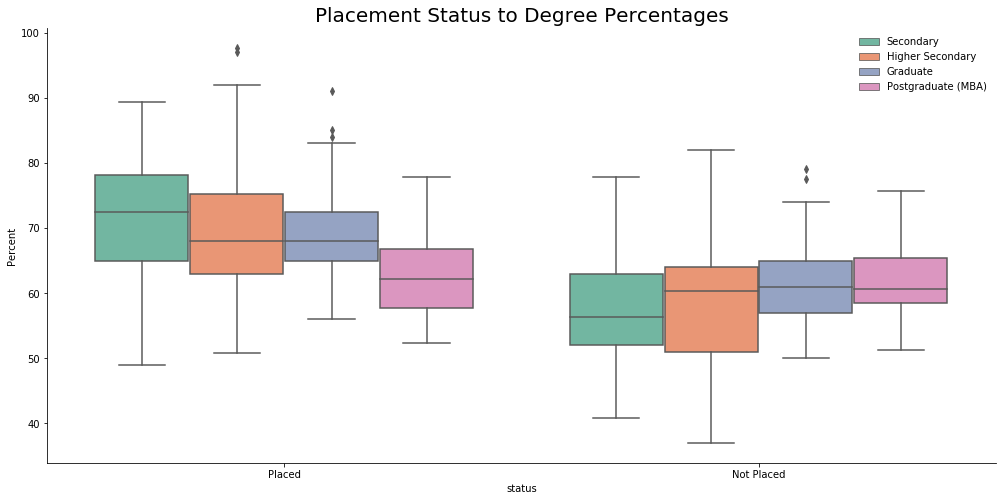

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

pct_df = placement_df.copy()
cols = ["ssc_p", "hsc_p", "degree_p", "mba_p"]
pct_df = pct_df[cols + ["status"]]
pct_df = pd.melt(pct_df,id_vars = ["status"], value_vars = cols)

pct_df.rename(columns={"value": "Percent"}, inplace = True)
pct_df["variable"].replace(to_replace=cols, value=["Secondary", "Higher Secondary", "Graduate", "Postgraduate (MBA)"], inplace = True)

plt.figure(figsize=(17,8))
pcts = sns.boxplot(x = "status", y= "Percent", hue = "variable", data = pct_df, palette = "Set2")

for spine in ["top", "right"]:
    pcts.spines[spine].set_visible(False)


pcts.legend(frameon=False)
pcts.set_title("Placement Status to Degree Percentages", fontsize=20);

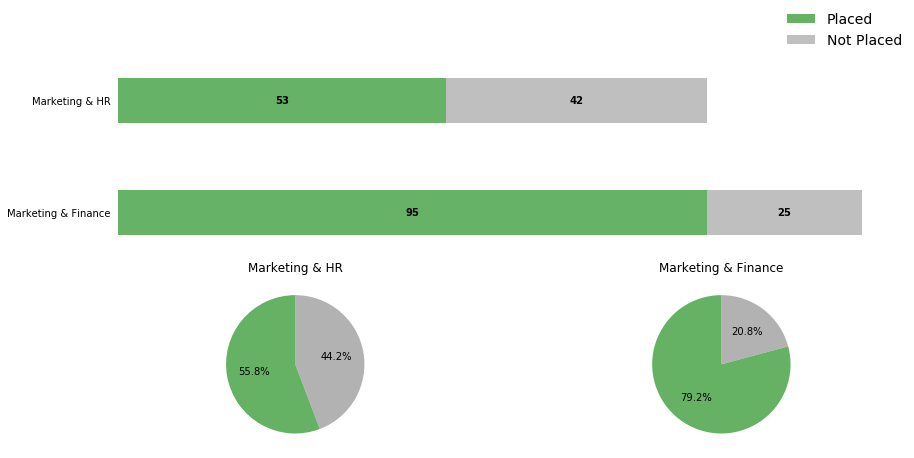

In [140]:
def bar_labels(bars, axes):
    # Taking bar artists and axes object and creates labels relating to the values
    for bar in bars:
        axes.text(bar.get_x() + bar.get_width()/2, bar.get_y()+bar.get_height()/2,
                  bar.get_width(), fontsize = 10, fontweight="bold",
                  color = "black", ha = "center", va = "center")

def remove_spines(axes):
    #Removing spines of a given axes object
    for spine in axes.spines.values():
        spine.set_visible(False)

def wedge_alpha(wedges):
    for i in range(len(wedges[0])):
        wedges[0][i].set_alpha(0.6)

#Copying Df
major_df = placement_df.loc[:,["status", "specialisation", "salary"]].copy()
placed = major_df[major_df["status"] == "Placed"].groupby("specialisation").count()
not_placed = major_df[major_df["status"] == "Not Placed"].groupby("specialisation").count()

#Creating gridspec
fig = plt.figure(figsize=(14,7))
spec = mpl.gridspec.GridSpec(2,2, figure = fig)

#Creating first Chart - Barchart with Placed/unplaced per specialisation
num = plt.subplot(spec[0,:])
bars_placed = num.barh(placed.index, placed["status"],height=0.4, color = "green", alpha = 0.6)
bars_not_placed = num.barh(not_placed.index, not_placed["status"],left=placed["status"], 
                           height = 0.4, color = "grey", alpha = 0.5)
plt.tick_params(bottom = False,
               labelbottom = False,
               left = False)
num.set_yticklabels(["Marketing & Finance", "Marketing & HR"])

remove_spines(num)

bar_labels(bars_placed, num)
bar_labels(bars_not_placed, num)
num.legend(labels=["Placed", "Not Placed"], frameon = False, loc=(0.85,1.1), prop={'size': 14})

#Creating two piecharts for percentages
major_df["count"] = 1
students = major_df.groupby(["specialisation", "status"]).count()

#HR
pie_hr = plt.subplot(spec[1,0])
pie_hr.set_title("Marketing & HR")
placed_hr_students = students.loc[("Mkt&HR", "Placed"),"count"]
not_placed_hr_students = students.loc[("Mkt&HR", "Not Placed"),"count"]
wedges_hr = pie_hr.pie([placed_hr_students, not_placed_hr_students], colors=["green", "grey"], 
                       startangle = 90, autopct="%1.1f%%")
wedge_alpha(wedges_hr)

#Finance
pie_fin = plt.subplot(spec[1,1])
pie_fin.set_title("Marketing & Finance")
placed_fin_students = students.loc[("Mkt&Fin", "Placed"),"count"]
not_placed_fin_students = students.loc[("Mkt&Fin", "Not Placed"),"count"]
wedges_fin = pie_fin.pie([placed_fin_students, not_placed_fin_students], colors=["green", "grey"], 
                         startangle = 90, autopct="%1.1f%%")
wedge_alpha(wedges_fin)


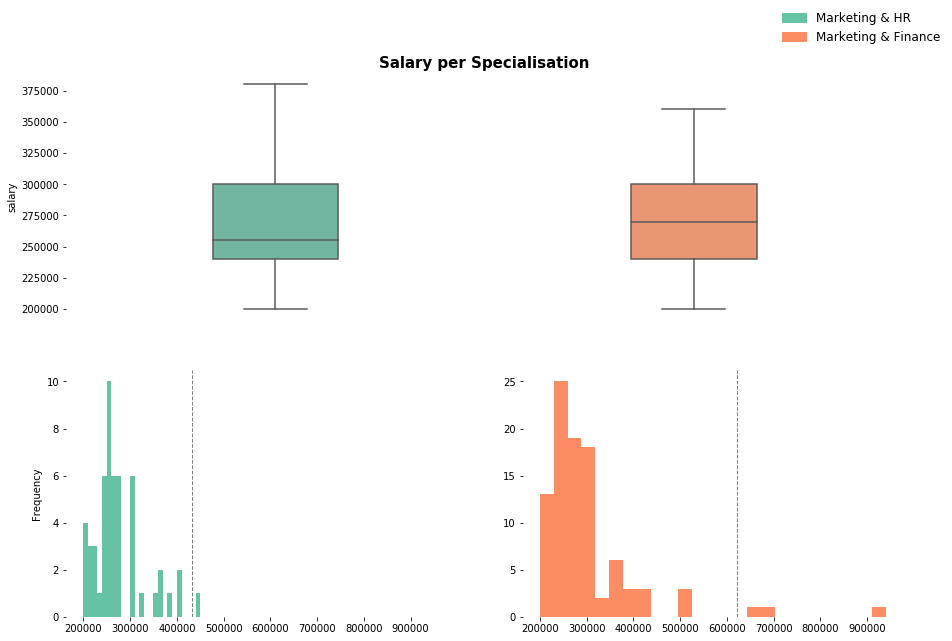

In [139]:
def spec_hist(pos, specialisation):
    temp_df = major_df["salary"][major_df["specialisation"] == specialisation].to_frame()
    mu = temp_df.values.mean()
    sd = temp_df.values.std()
    li = mu + 3*sd
    
    if pos == 0:
        plt.subplot(spec2[1,pos])
    else:
        plt.subplot(spec2[1,pos], sharex = hist_hr)
    plt.hist(temp_df["salary"], bins = 25, color = palette[pos])
    plt.axvline(li, color='grey', linestyle='dashed', linewidth=1)
    remove_spines(plt.gca())
    
    return plt.gca()

major_df = major_df[["specialisation", "salary"]].dropna()
fig2 = plt.figure(figsize=(15,10))

spec2 = mpl.gridspec.GridSpec(2,2, figure = fig2)

#Create Main Boxplot
plt.subplot(spec2[0,0:])
sns.boxplot(x = "specialisation", y = "salary", data = major_df, showfliers = False, palette = "Set2", width = 0.3)
remove_spines(plt.gca())
plt.gca().set_xticklabels(["Marketing & HR", "Marketing & Finance"])
plt.title("Salary per Specialisation", fontsize=15, fontweight="bold")
plt.xlabel(None)
plt.tick_params(axis = "x",
               labelbottom = False,
               bottom = False)

#Create Legend
palette = sns.color_palette(palette="Set2")
hr_leg = mpl.patches.Patch(color=palette[0], label="Marketing & HR")
fin_leg = mpl.patches.Patch(color=palette[1], label="Marketing & Finance")
plt.legend(handles=[hr_leg, fin_leg], frameon = False, loc=(0.85,1.1), prop={'size': 12})


#Create histograms
hist_hr = spec_hist(0, "Mkt&HR")
hist_fin = spec_hist(1, "Mkt&Fin")
hist_hr.set_ylabel("Frequency");